In [1]:
from keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from keras import Input, Model
from keras.datasets import mnist
import wfdb
from wfdb import processing
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
from sklearn.decomposition import PCA
import tensorflow as tf
tf.config.run_functions_eagerly(True)
%matplotlib inline

In [2]:
record_number = '05091'
filepath = 'D:/phd/mit-bih-atrial-fibrillation-database-1.0.0/files/' + record_number
record = wfdb.rdrecord(filepath)#, sampto = 10000) 
annotation = wfdb.rdann(filepath,'atr', shift_samps=True)#, sampto = 10000)

In [3]:
sig = record.p_signal[:150000,0]
sig_peaks, _ = signal.find_peaks(sig)
t = []
for i in sig_peaks:
    if sig[i] > 0.25:
        t.append(i)
s = []


for i in t:
    r = wfdb.rdrecord(filepath, sampfrom=i-100, sampto=i+100)
    s.append(r.p_signal[:,0])

In [4]:
encoding_dim = 64 
input_img = Input(shape=(200,))
# encoded representation of input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# decoded representation of code 
decoded = Dense(200, activation='sigmoid')(encoded)
# Model which take input image and shows decoded images
autoencoder = Model(input_img, decoded)

In [5]:
# This model shows encoded images
encoder = Model(input_img, encoded)
# Creating a decoder model
encoded_input = Input(shape=(encoding_dim,))
# last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [6]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [7]:
m = np.array(s)
autoencoder.fit(m, m, epochs=15, batch_size=256)

C:\Users\houfo\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/15
8/8 [==============================] - 1s 43ms/step - loss: 0.6870
Epoch 2/15
8/8 [==============================] - 1s 65ms/step - loss: 0.6609
Epoch 3/15
8/8 [==============================] - 1s 70ms/step - loss: 0.6321
Epoch 4/15
8/8 [==============================] - 1s 65ms/step - loss: 0.6000
Epoch 5/15
8/8 [==============================] - 1s 64ms/step - loss: 0.5622
Epoch 6/15
8/8 [==============================] - 1s 64ms/step - loss: 0.5234
Epoch 7/15
8/8 [==============================] - 0s 61ms/step - loss: 0.4877
Epoch 8/15
8/8 [==============================] - 1s 68ms/step - loss: 0.4577
Epoch 9/15
8/8 [==============================] - 0s 54ms/step - loss: 0.4325
Epoch 10/15
8/8 [==============================] - 0s 25ms/step - loss: 0.4120
Epoch 11/15
8/8 [==============================] - 0s 49ms/step - loss: 0.3919
Epoch 12/15
8/8 [==============================] - 1s 67ms/step - loss: 0.3724
Epoch 13/15
8/8 [==============================] - 1s 62ms/st

In [8]:
def process_row(record_number, path):
    filepath = 'D:/phd/mit-bih-atrial-fibrillation-database-1.0.0/files/' + record_number
    record = wfdb.rdrecord(filepath)#, sampto = 10000)
    ann = wfdb.rdann(filepath,'atr')
    sig = record.p_signal[:150000,0]
    sig_peaks, _ = signal.find_peaks(sig)
    t = []
    for i in sig_peaks:
        if sig[i] > 0.25:
            t.append(i)
    s = []
    annIndexes = []
    for i in range(len(t)):
        val = t[i]
        if val < 100:
            continue
        r = wfdb.rdrecord(filepath, sampfrom=val-100, sampto=val+100)
        for j in ann.sample:
            if val-100 < j and val + 100 > j:
                annIndexes.append(i)
                break
        s.append(r.p_signal[:,0])
    
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(s)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
    principalDf["color"] = "blue"
    principalDf.loc[annIndexes, "color"] = "red"
    addInfo = ""
    if len(annIndexes) == 0:
        addInfo = "empty"
    principalDf.plot(x ='principal component 1', y='principal component 2', alpha=0.5, kind = 'scatter', title = "Record = "+record_number + " " + addInfo, color=principalDf["color"])

04015
04043
04048
04126
04746
04908
04936
05091
05121
05261
06426
06453
06995
07162
07859
07879
07910
08215
08219
08378
08405


C:\Users\houfo\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


08434
08455


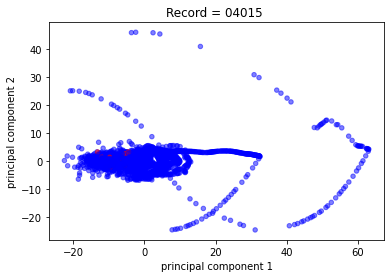

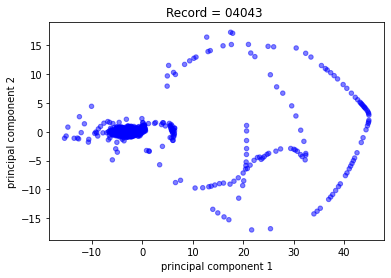

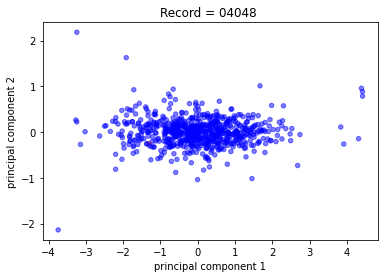

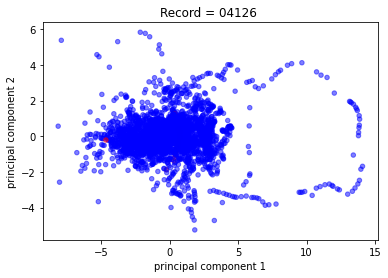

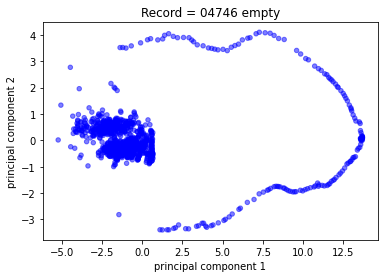

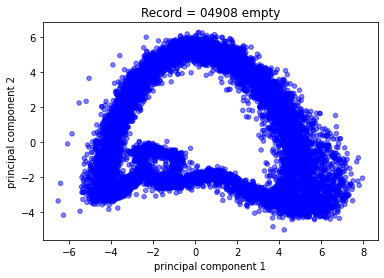

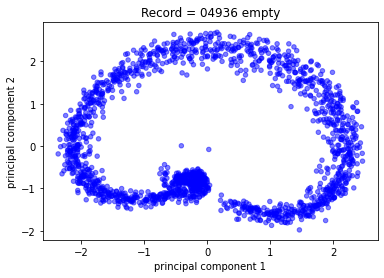

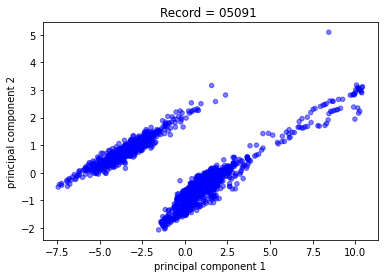

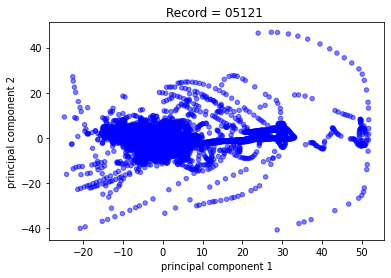

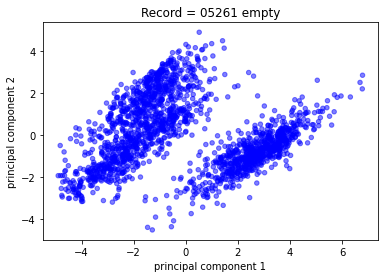

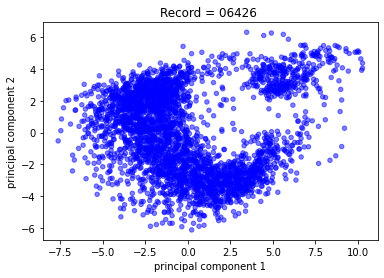

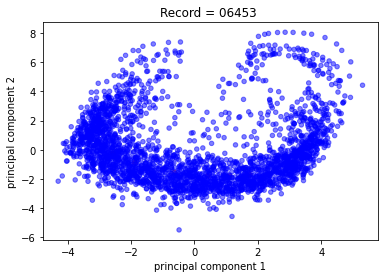

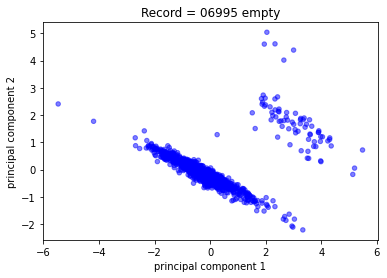

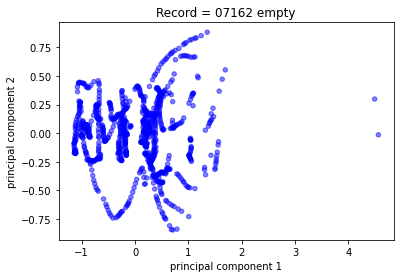

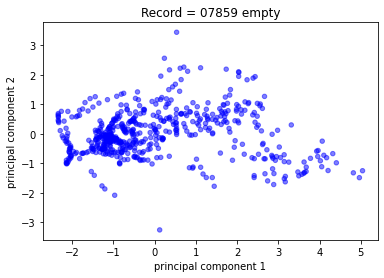

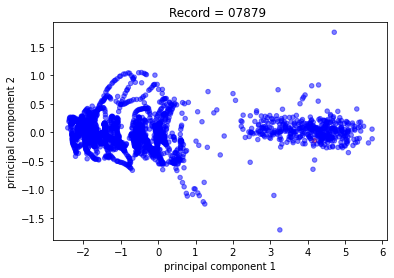

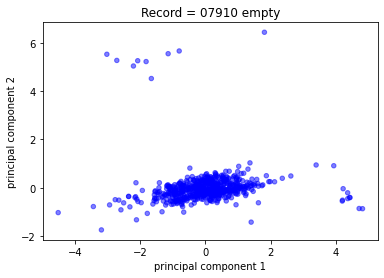

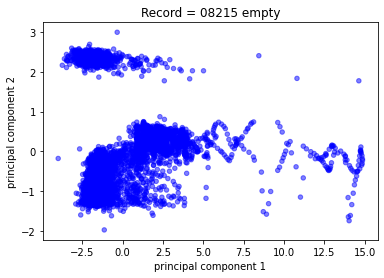

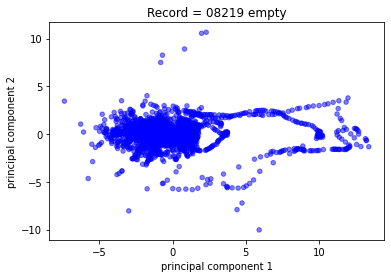

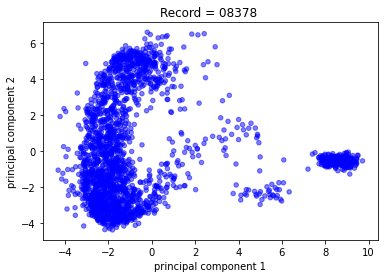

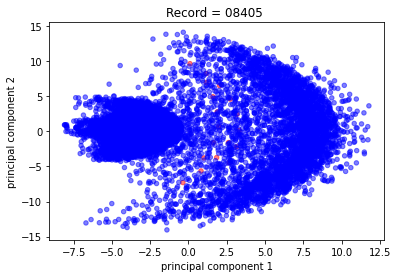

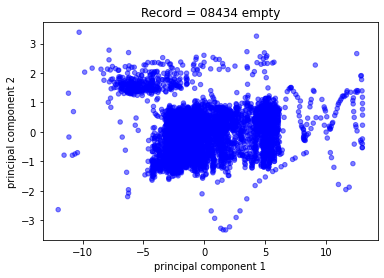

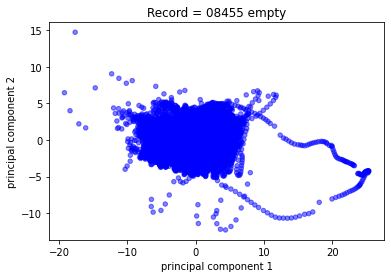

In [9]:
a = [
'04015',
'04043',
'04048',
'04126',
'04746',
'04908',
'04936',
'05091',
'05121',
'05261',
'06426',
'06453',
'06995',
'07162',
'07859',
'07879',
'07910',
'08215',
'08219',
'08378',
'08405',
'08434',
'08455',
]
for row in a:
    print(row)
    process_row(row, "")
        